## Installing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.Max_columns', None)
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline
sns.set()


## Understanding the data

In [2]:
data = pd.read_csv(r'Data\Final_train_data.csv')
df= data.copy()

In [3]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]


In [4]:
df.shape

(9172, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on_thyroxine               9172 non-null   object
 3   query_on_thyroxine         9172 non-null   object
 4   on_antithyroid_medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid_surgery            9172 non-null   object
 8   I131_treatment             9172 non-null   object
 9   query_hypothyroid          9172 non-null   object
 10  query_hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [6]:
df.describe()

,age
count,9172.000000
mean,73.555822
std,1183.976718
min,1.000000
25%,37.000000
50%,55.000000
75%,68.000000
max,65526.000000


## Handeling Data Inconsistancy

In [7]:
# Checking for missing values
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
index,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The above dataframe shows, there are no missing value present in the dataset but the absent values has shown with "?" symbol.
* Let's first replace it with NaN and check the number of missing values in each attribute.

In [8]:
# Replacing "?" with nan values
df = df.replace('?',np.nan)
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
index,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,0,307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,842,0,2604,0,442,0,809,0,802,0,8823,0,0


In [9]:
df['TBG_measured'].value_counts()

f    8823
t     349
Name: TBG_measured, dtype: int64

* The variable TBG has almost all the values are NaN values, so it will not provide any meaningful information. It is better to drop the whole feature.
* Another thing to observe, The values of attributes like T3, TT4, etc are present where its measured attribute is showing True. We do not need two different attributes that provide similar information.

In [10]:
# dropping the columns that show similar information
columns_measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured', 'TBG_measured', 'TBG']
df.drop(columns_measured,axis=1,inplace= True)

In [11]:
df['Class'].head()

0    -[840801013]
1    -[840801014]
2    -[840801042]
3    -[840803046]
4    S[840803047]
Name: Class, dtype: object

* In the target variable there are in consistency in the classes. We will define the values that starts with "-" symbol as negative which means patient has tested negative for thyroid or healthy. The record starts with alphabates represent the thyroid condition patient may have.

In [12]:
for i in range(len(df['Class'].unique())):
    pattern = r'[A-Za-z]+'
    if str(df['Class'][i]).startswith('-'):
        df['Class'][i]= "Nagetive"
    else:
        x = re.findall(pattern,df['Class'][i])
        df['Class'][i] = ''.join(x)


C:\Users\49179\AppData\Local\Temp\ipykernel_54108\1735254480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i]= "Nagetive"
C:\Users\49179\AppData\Local\Temp\ipykernel_54108\1735254480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i] = ''.join(x)


In [13]:
df['Class'].unique()

array(['Nagetive', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A',
       'KJ', 'L', 'MK', 'Q', 'J', 'CI', 'O', 'LJ', 'HK', 'D', 'GK', 'MI',
       'P', 'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'DR', 'E'], dtype=object)

In [14]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN,other,Nagetive
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,NaN,NaN,other,Nagetive
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,other,Nagetive
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,other,Nagetive
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,other,S


## Handling Categorical variable

In [15]:
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [16]:
# Firstly, we encode the sex attribute as it has only two categories.
df['sex'] = df['sex'].map({'M' : 0,'F': 1})

In [17]:
# Secondly, Variables with bool value also be encoded
for var in df.columns:
    if len(df[var].unique()) == 2:
       df[var] = df[var].map({'f': 0, 't': 1})

In [18]:
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [19]:
# We can get dummies for refferal_sources as it has more than two categories and that also are not in order.
df = pd.get_dummies(df, columns=['referral_source'],prefix='ref')

In [20]:
df['Class'].unique()

array(['Nagetive', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A',
       'KJ', 'L', 'MK', 'Q', 'J', 'CI', 'O', 'LJ', 'HK', 'D', 'GK', 'MI',
       'P', 'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'DR', 'E'], dtype=object)

In [21]:
# Lastly, we label encode our target attribute "Class"
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])


In [22]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,ref_STMW,ref_SVHC,ref_SVHD,ref_SVI,ref_WEST,ref_other
0,29,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.3,NaN,NaN,NaN,NaN,25,0,0,0,0,0,1
1,29,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128,NaN,NaN,25,0,0,0,0,0,1
2,41,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,25,0,0,0,0,0,1
3,36,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,25,0,0,0,0,0,1
4,32,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,31,0,0,0,0,0,1


* Now, after encoding all of our categorical attributes, let's deal with missing values present in the dataset.

## Handling Missing values

In [23]:
from sklearn.impute import KNNImputer
KnnIm=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
Imp=KnnIm.fit_transform(df)
df=pd.DataFrame(data=Imp, columns=df.columns)

In [24]:
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,ref_STMW,ref_SVHC,ref_SVHD,ref_SVI,ref_WEST,ref_other
9167,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.743333,2.366667,64.0,0.83,77.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0
9168,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566667,1.966667,91.0,0.92,99.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0
9169,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.466667,1.233333,113.0,1.27,89.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0
9170,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463333,1.866667,75.0,0.85,88.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0
9171,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.366667,66.0,1.02,65.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
ref_STMW                     0
ref_SVHC                     0
ref_SVHD                     0
ref_SVI                      0
ref_WEST                     0
ref_other                    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   float64
 1   sex                        9172 non-null   float64
 2   on_thyroxine               9172 non-null   float64
 3   query_on_thyroxine         9172 non-null   float64
 4   on_antithyroid_medication  9172 non-null   float64
 5   sick                       9172 non-null   float64
 6   pregnant                   9172 non-null   float64
 7   thyroid_surgery            9172 non-null   float64
 8   I131_treatment             9172 non-null   float64
 9   query_hypothyroid          9172 non-null   float64
 10  query_hyperthyroid         9172 non-null   float64
 11  lithium                    9172 non-null   float64
 12  goitre                     9172 non-null   float64
 13  tumor                      9172 non-null   float

<Axes: >

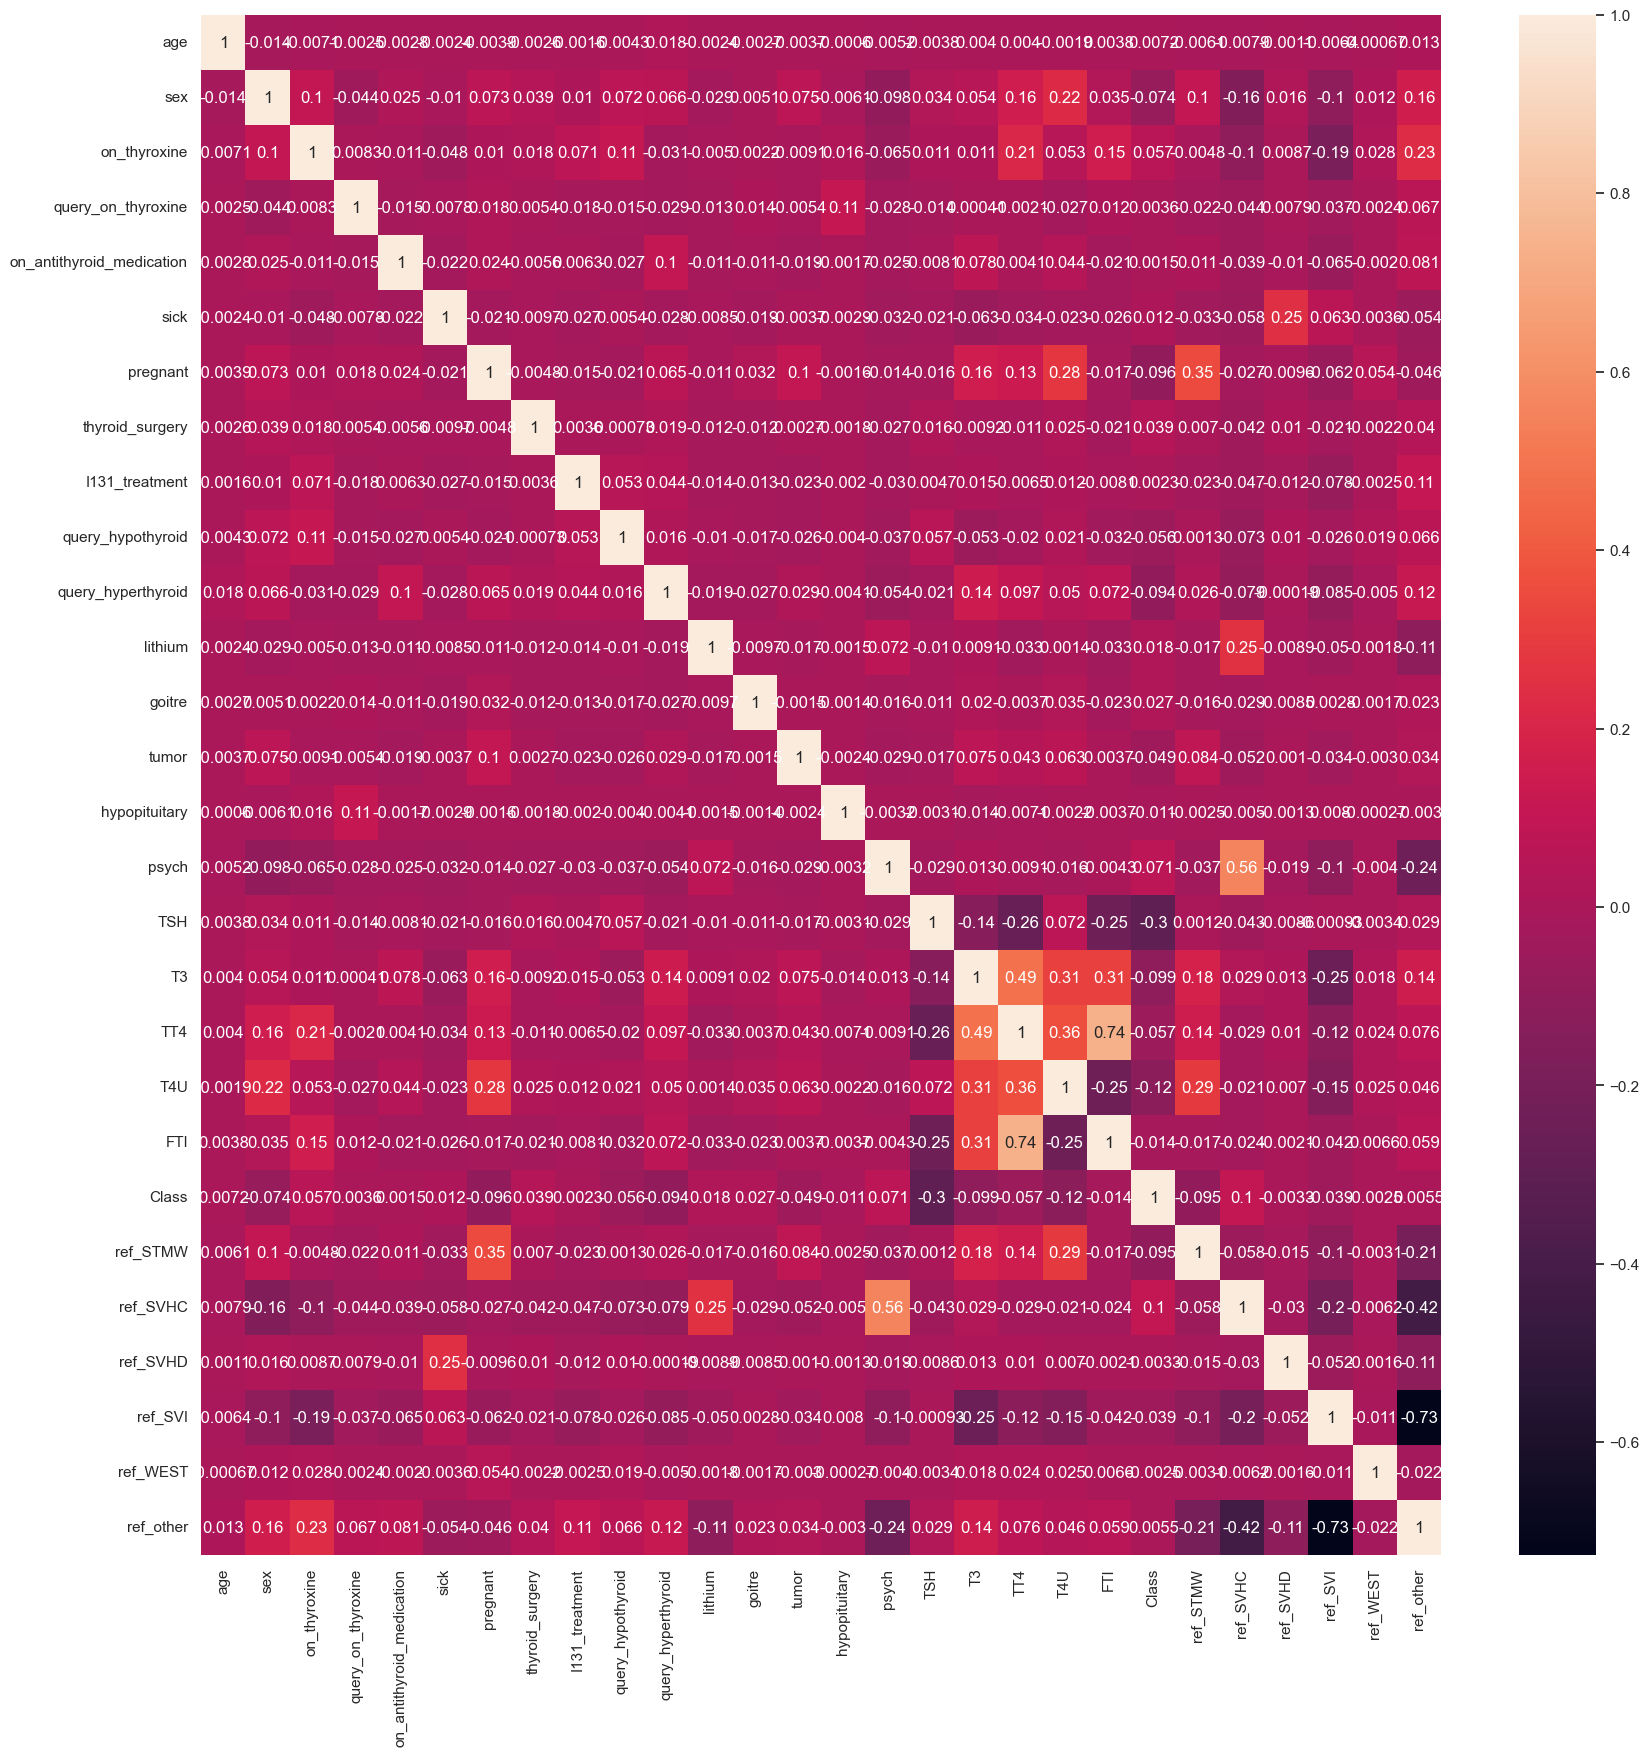

In [27]:
## Visualizing the data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

## Checking the distribution of the continuous Variables

C:\Users\49179\AppData\Local\Temp\ipykernel_54108\3928690117.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols],kde=True)
C:\Users\49179\AppData\Local\Temp\ipykernel_54108\3928690117.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols],kde=True)
C:\Users\49179\AppData\Local\Tem

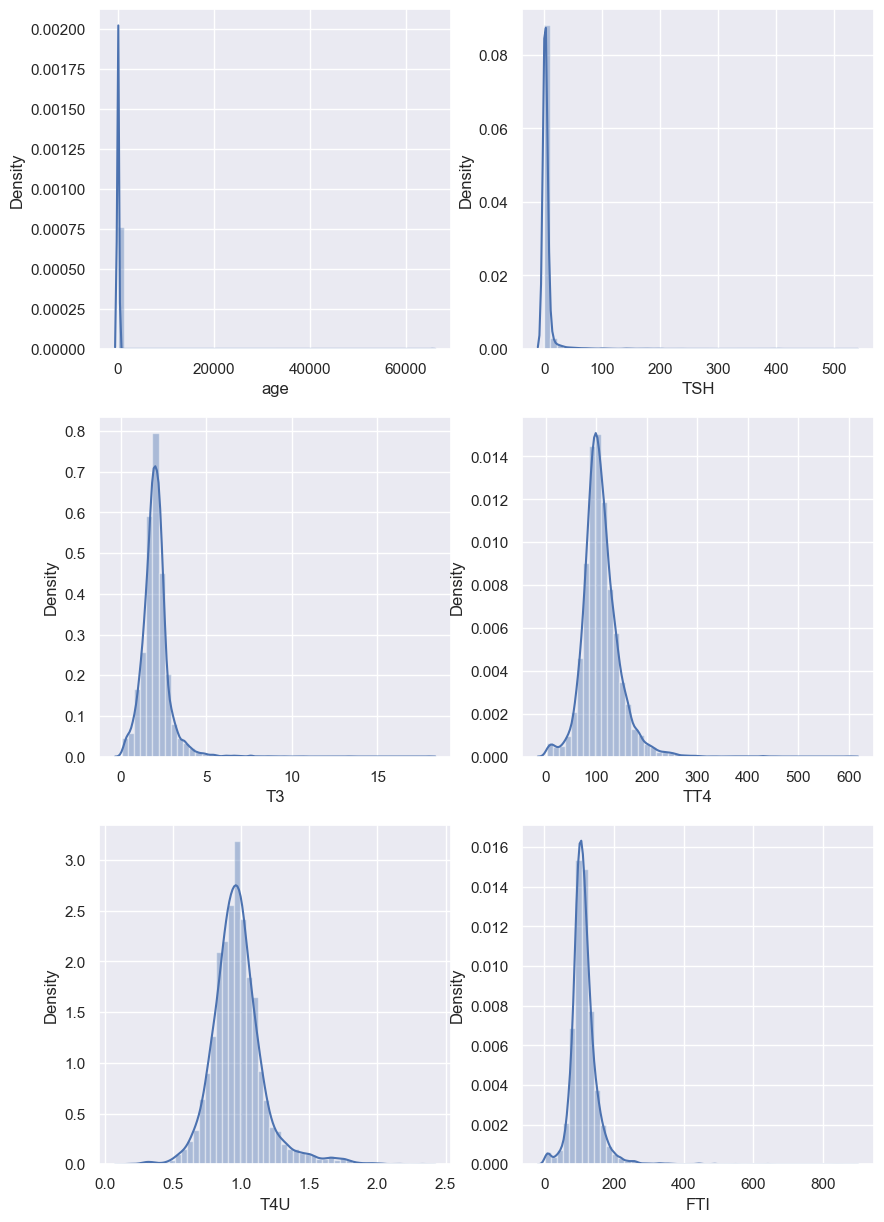

In [28]:
continuous_att = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize = (10,15))
pltnum = 1
for cols in continuous_att:
    ax = plt.subplot(3,2,pltnum)
    sns.distplot(df[cols],kde=True)
    plt.xlabel(cols)
    pltnum += 1
plt.show()


* It is clear from the histogram above, The data distribution is skewed on the left. We can improve it by applying log to it.

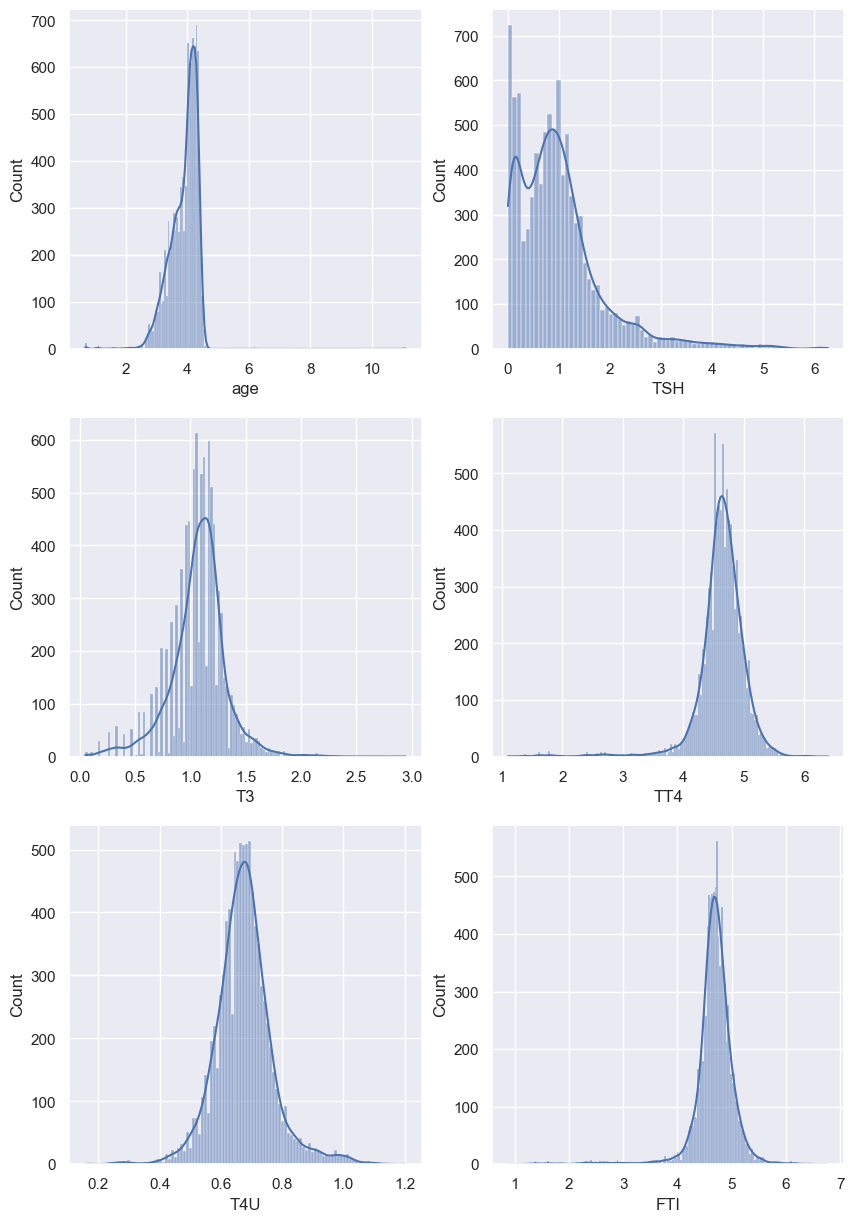

In [29]:
continuous_att = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize = (10,15))
pltnum = 1
for cols in continuous_att:
    df[cols] += 1
    ax = plt.subplot(3,2,pltnum)
    sns.histplot(np.log(df[cols]),kde=True)
    plt.xlabel(cols)
    pltnum += 1
plt.show()

* The attribute TSH has wierd trend. it is better to drop the attribute.

In [30]:
df = df.drop(['TSH'],axis = 1)

In [31]:
df['Class'].unique()

array([25., 31.,  8.,  1., 30., 15., 21., 24., 10., 17.,  0., 18., 19.,
       23., 29., 16.,  4., 26., 20., 14.,  5., 12., 22., 28.,  9.,  2.,
       11.,  3., 13., 27.,  6.,  7.])

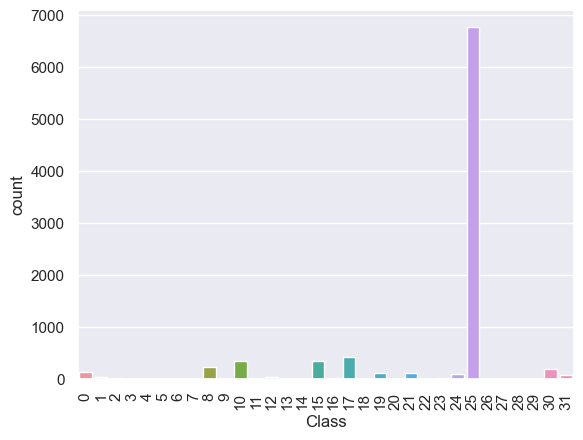

In [32]:
df['Class'] = df['Class'].astype(int)
sns.countplot(data= df, x='Class')
plt.xticks(rotation=90)
plt.show()

* From the countplot above, we can see that class 25 has the large proportion records and it will not help us to recognize the other classes.
* It will be helpful to perform oversampling techniques.

In [33]:
from imblearn.over_sampling import RandomOverSampler,SMOTENC
x = df.drop(['Class'],axis= 1)
y = df['Class']
rsmaple = RandomOverSampler()
x_sample, y_sample = rsmaple.fit_resample(x,y)

In [34]:
x_sample.shape

(216672, 26)

In [35]:
x_sample = pd.DataFrame(x_sample,columns=x.columns)
x_sample.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,ref_STMW,ref_SVHC,ref_SVHD,ref_SVI,ref_WEST,ref_other
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.200000,118.000000,1.960000,120.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.900000,129.000000,1.976667,133.333333,0.0,0.0,0.0,0.0,0.0,1.0
2,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.133333,97.333333,1.916667,105.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.300000,100.000000,2.030000,88.333333,0.0,0.0,0.0,0.0,0.0,1.0
4,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.866667,160.000000,1.993333,160.333333,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
y_sample = pd.DataFrame(y_sample)
y_sample.head()

,Class
0,25
1,25
2,25
3,25
4,31


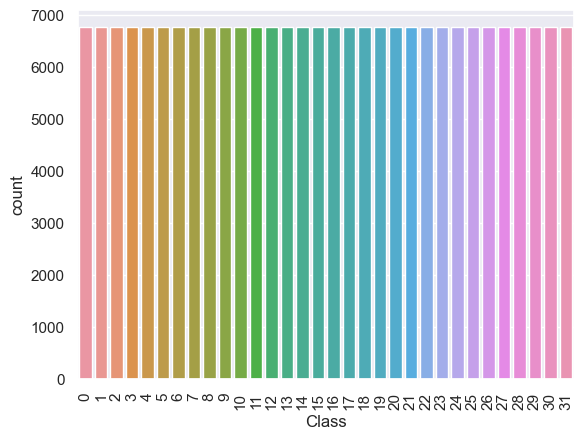

In [37]:
sns.countplot(data = y_sample,x = 'Class')
plt.xticks(rotation=90)
plt.show()

* Now, we have equal number of records to each class.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler.fit(x_sample)
scaled_data = scaler.transform(x_sample)

In [40]:
scaled_data

array([[-0.09457025,  0.55864557, -0.58046258, ..., -0.53011474,
        -0.01156982,  0.67150733],
       [-0.09457025,  0.55864557, -0.58046258, ..., -0.53011474,
        -0.01156982,  0.67150733],
       [-0.04545929,  0.55864557, -0.58046258, ..., -0.53011474,
        -0.01156982,  0.67150733],
       ...,
       [-0.09457025,  0.55864557, -0.58046258, ..., -0.53011474,
        -0.01156982,  0.67150733],
       [-0.10684799,  0.55864557, -0.58046258, ..., -0.53011474,
        -0.01156982,  0.67150733],
       [-0.10684799,  0.55864557, -0.58046258, ..., -0.53011474,
        -0.01156982,  0.67150733]])

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
x_pca = pca.fit_transform(scaled_data)

In [42]:
X = pd.DataFrame(data = x_pca,columns=['component_1','component_2','component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10','component_11','component_12'])

In [43]:
X.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12
0,-0.206744,-0.739870,-0.932723,0.417608,0.087478,0.371639,-0.803394,0.359555,-0.295784,0.054062,-0.195208,0.023845
1,0.274032,-0.607458,-0.043140,-0.274780,-0.117809,-0.048583,0.022897,0.303061,-0.434613,0.073557,-0.028269,0.064016
2,0.532044,-0.932938,-0.117944,-0.182585,-0.354366,-1.293736,-0.326975,1.937321,0.430907,-0.194190,0.196781,-0.430452
3,0.128383,-0.405160,-0.471342,-0.088041,-0.100002,-0.128502,0.050946,0.336022,-0.339454,0.041745,-0.014257,0.036085
4,0.571293,-0.717223,0.254332,-0.382845,-0.146744,-0.019888,0.014963,0.303334,-0.499836,0.131945,-0.051280,0.122343


array([[<Axes: title={'center': 'component_1'}>,
        <Axes: title={'center': 'component_2'}>,
        <Axes: title={'center': 'component_3'}>],
       [<Axes: title={'center': 'component_4'}>,
        <Axes: title={'center': 'component_5'}>,
        <Axes: title={'center': 'component_6'}>],
       [<Axes: title={'center': 'component_7'}>,
        <Axes: title={'center': 'component_8'}>,
        <Axes: title={'center': 'component_9'}>],
       [<Axes: title={'center': 'component_10'}>,
        <Axes: title={'center': 'component_11'}>,
        <Axes: title={'center': 'component_12'}>]], dtype=object)

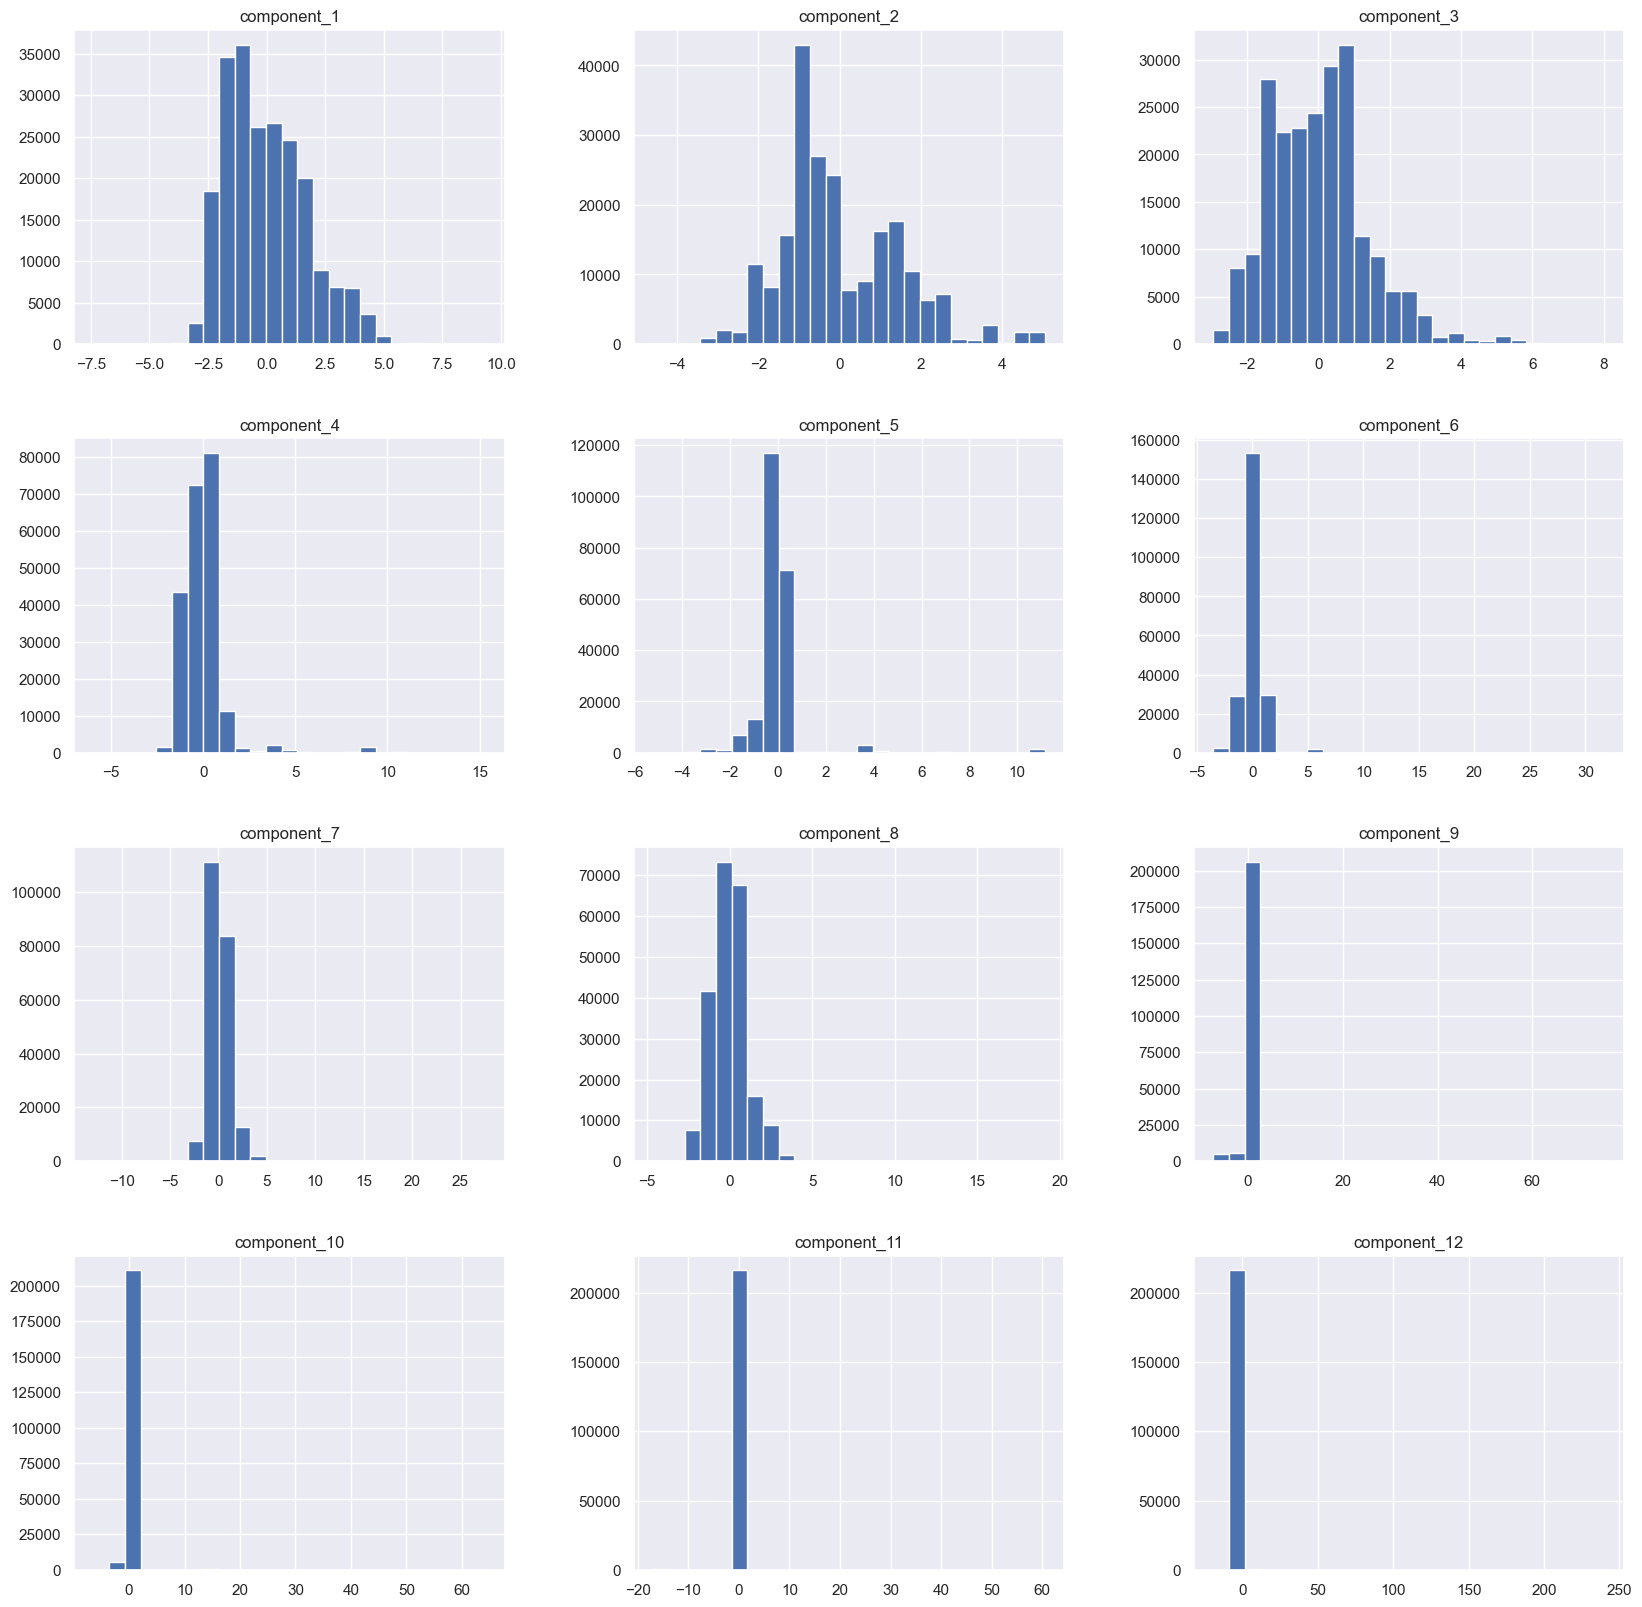

In [44]:
X.hist(bins=25,figsize=(20,20))

In [45]:
pca.explained_variance_

array([2.90608515, 2.1975899 , 1.92225422, 1.6003076 , 1.50587079,
       1.20437271, 1.18048638, 1.1170801 , 1.03311074, 1.00710604,
       1.00349289, 0.99581017])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,y_sample,test_size=0.3,random_state= 42)

In [47]:
def prediction(base_model):
    print(f'Model name: {base_model}')
    model = base_model.fit(x_train,y_train)
    score = model.score(x_train, y_train)
    print(f"Model score: {float(format(score,'.3f'))}")
    prediction = model.predict(x_test)
    print(f'prediction: {prediction}')
    print(f"r2 score: {float(format(r2_score(y_test,prediction),'.3f'))}")
    print(f"MAE: {float(format(mean_absolute_error(y_test,prediction),'.3f'))}")
    print(f"MSE: {float(format(mean_squared_error(y_test,prediction),'.3f'))}")

In [48]:
prediction(LogisticRegression(max_iter=1000))

Model name: LogisticRegression(max_iter=1000)


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score: 0.764
prediction: [26  5  1 ... 29 18 14]
r2 score: 0.526
MAE: 2.253
MSE: 40.41


In [49]:
prediction(KNeighborsClassifier(n_neighbors=3))

Model name: KNeighborsClassifier(n_neighbors=3)


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model score: 0.996
prediction: [26  5  1 ... 29 18  9]
r2 score: 0.987
MAE: 0.083
MSE: 1.132


In [50]:
prediction(DecisionTreeClassifier(max_depth=3))

Model name: DecisionTreeClassifier(max_depth=3)
Model score: 0.135
prediction: [22 22 22 ... 29 22 22]
r2 score: -0.396
MAE: 8.557
MSE: 118.951


In [51]:
prediction(RandomForestClassifier(max_depth=3,n_estimators=200))

Model name: RandomForestClassifier(max_depth=3, n_estimators=200)


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model score: 0.463
prediction: [26  5 11 ... 29 13 14]
r2 score: 0.251
MAE: 4.715
MSE: 63.777


In [52]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_sample,y_sample,test_size=0.3,random_state= 42)

In [53]:
def prediction1(base_model):
    print(f'Model name: {base_model}')
    model = base_model.fit(x_train_,y_train_)
    score = model.score(x_train_, y_train_)
    print(f"Model score: {float(format(score,'.3f'))}")
    prediction = model.predict(x_test_)
    print(f'prediction: {prediction}')
    print(f"r2 score: {float(format(r2_score(y_test_,prediction),'.3f'))}")
    print(f"MAE: {float(format(mean_absolute_error(y_test_,prediction),'.3f'))}")
    print(f"MSE: {float(format(mean_squared_error(y_test_,prediction),'.3f'))}")

In [55]:
prediction1(LogisticRegression(max_iter=1000))

Model name: LogisticRegression(max_iter=1000)


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score: 0.761
prediction: [26  0  1 ... 29 18 14]
r2 score: 0.499
MAE: 2.414
MSE: 42.713


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
prediction1(KNeighborsClassifier(n_neighbors=3))

Model name: KNeighborsClassifier(n_neighbors=3)


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\49179\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\49179\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Model score: 0.994
prediction: [26  5  1 ... 29 18  9]
r2 score: 0.984
MAE: 0.106
MSE: 1.326


In [57]:
prediction1(DecisionTreeClassifier(max_depth=3))

Model name: DecisionTreeClassifier(max_depth=3)
Model score: 0.159
prediction: [ 6  5  5 ...  6 18  6]
r2 score: -1.141
MAE: 10.652
MSE: 182.4


In [58]:
prediction1(RandomForestClassifier(max_depth=3,n_estimators=200))

Model name: RandomForestClassifier(max_depth=3, n_estimators=200)


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model score: 0.712
prediction: [26  5  1 ... 29 18 14]
r2 score: 0.329
MAE: 3.019
MSE: 57.207


In [112]:
prediction(SVC(kernel='rbf'))

Model name: SVC()


C:\Users\49179\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
